<a href="https://colab.research.google.com/github/j0rge-20/Precip/blob/main/2_Precipitacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Links
#p1
#https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651
#p2
#https://towardsdatascience.com/demand-prediction-with-lstms-using-tensorflow-2-and-keras-in-python-1d1076fc89a0

#codigo 
#https://colab.research.google.com/drive/1k3PLdczAJOIrIprfhjZ-IRXzNhFJ_OTN


#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/


#Epoch Definition
#https://radiopaedia.org/articles/epoch-machine-learning

#Val loss
#https://datascience.stackexchange.com/questions/25267/keras-difference-beetween-val-loss-and-loss-during-training
#https://stackoverflow.com/questions/47299624/how-to-understand-loss-acc-val-loss-val-acc-in-keras-model-fitting
#-----------------------------------------------------------------------------

#LSTM Model  (create a& save model for future use)
#https://machinelearningmastery.com/make-predictions-long-short-term-memory-models-keras/

#Multi -step LSTM
#https://machinelearningmastery.com/multi-step-time-series-forecasting/
#https://medium.com/analytics-vidhya/multi-step-lstm-time-series-forecasting-bf82889ed173
#functions
#https://machinelearningmastery.com/multi-step-time-series-forecasting-long-short-term-memory-networks-python/
#https://stats.stackexchange.com/questions/265426/how-to-make-lstm-predict-multiple-time-steps-ahead
#video
#https://www.youtube.com/watch?v=HeQpGKNqkcs


#links - univariate
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
#https://machinelearningmastery.com/how-to-develop-deep-learning-models-for-univariate-time-series-forecasting/

#101 tutorials LSTM
#https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/
#https://www.youtube.com/watch?v=LiBFV7ptm4M
#https://towardsdatascience.com/recurrent-neural-networks-by-example-in-python-ffd204f99470
#https://stackoverflow.com/questions/57167001/predicting-future-values-in-a-multivariate-time-forecasting-lstm-model
#https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/


#references keras
#https://keras.io/guides/sequential_model/
#https://keras.io/api/layers/recurrent_layers/bidirectional/
#https://keras.io/api/layers/recurrent_layers/lstm/
#https://www.tutorialspoint.com/keras/keras_dense_layer.htm
#https://keras.io/api/models/model_training_apis/  (fit method)


#metrics
#https://keras.io/api/models/model_training_apis/
#https://www.tensorflow.org/api_docs/python/tf/keras/metrics
#https://stackoverflow.com/questions/39475420/validation-loss-and-accuracy-in-lstm-networks-with-keras
#https://www.youtube.com/watch?v=GMrTBtzJkCg


#MSE
#https://www.youtube.com/watch?v=fWFVXEXwIBQ
#https://www.mygreatlearning.com/blog/mean-square-error-explained/

#model compile
#https://keras.io/api/models/model_training_apis/


#Adam Optimizer
#https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
#https://keras.io/api/optimizers/
#https://keras.io/api/optimizers/adam/
#https://datasmarts.net/es/que-es-un-optimizador-y-para-que-se-usa-en-deep-learning/

#Iteration vs Epochs vs BatchSize
#https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9

#Sequential
#https://keras.io/guides/sequential_model/

#Bidirectional
#https://keras.io/api/layers/recurrent_layers/bidirectional/

#hiperparametro vs parametro
#https://www.analyticslane.com/2019/12/16/cual-es-la-diferencia-entre-parametro-e-hiperparametro/

#!pip install -q tensorflow-gpu
!pip install pandasql

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import pandasql as ps
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from pandasql import sqldf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Dropout

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

#sql function def
pysqldf = lambda q: sqldf(q, globals())


#load dataset
#@title Loading dataset
path = 'https://raw.githubusercontent.com/j0rge-20/Precip/main/DatasetFull_v2.csv'


df = pd.read_csv(path,
                 parse_dates=['Fecha'],
                 index_col="Fecha")


#load dataset
#@title Loading dataset
path2 = 'https://raw.githubusercontent.com/j0rge-20/Precip/main/Dataset_features.csv'


dff = pd.read_csv(path2,
                 parse_dates=['Fecha'],
                 index_col="Fecha")


In [ ]:
#validations 
sqldf('select Estacion from (select Anio,Mes,Estacion, count(1) as qty from df  group by Anio,Mes,Estacion) where qty > 1 group by Estacion')
#sqldf('select * from df where Estacion = 2120559') # 612 
#df.loc[(df['Estacion']== 2120559) & (df['Anio']==1968)]
#df.query('Estacion == 2120559 & Anio == 1968')


,Estacion


In [ ]:
sqldf('select Estacion, count(1)/12 as anios from df group by Estacion order by anios desc')

,Estacion,anios
0,2120540,58
1,2306507,54
2,2120557,53
3,2401519,53
4,2120562,52
5,2120548,51
6,2120559,51
7,2120561,38
8,2120629,35
9,2401513,33


In [ ]:


#df.head()

#función para crear dataframe por estaction
def sub_esta (df,cod):
    return df.query('Estacion in @cod')

#funcion para crear dataframe por mes
def sub_mes (df,m):  
  return df.query('Mes in @m')

#funcion para crear dataset por estacion y mes
def sub_pred (df,cod_est,mes,tam):
  return df.query('Estacion in @cod_est & Mes in @mes').sort_values(by=['Anio']).tail(tam)
  #return df.query('Estacion in @cod_est & Mes in @mes').sort_values(by=['Anio'],ascending=False).head(10)

cod_estacion = '2120540'
mes = '1'
#cod_estacion = '2120559'

#dataset entrenamiento
df_est = sub_esta (df,cod_estacion)

df_ene = sub_mes(df_est,[1])
# df_feb = sub_mes(df_est,[2])

#dataset estacion prediccion
df_pred = sub_pred (df,cod_estacion,mes,11)


In [ ]:
df_pred


,Anio,Mes,Estacion,Precipitacion,Temperatura,Humedad,BrilloSolar
Fecha,,,,,,,
2009-01-01,2009,1,2120540,71.7,13.20,71.0,68.7
2010-01-01,2010,1,2120540,0.0,15.40,51.0,232.4
2011-01-01,2011,1,2120540,37.7,14.30,63.0,229.1
2012-01-01,2012,1,2120540,52.5,13.90,72.0,194.4
2013-01-01,2013,1,2120540,6.3,13.70,73.0,233.7
2014-01-01,2014,1,2120540,49.0,14.20,77.0,188.3
2015-01-01,2015,1,2120540,5.8,12.20,74.0,197.9
2016-01-01,2016,1,2120540,34.2,16.10,66.0,234.6
2017-01-01,2017,1,2120540,55.4,13.80,81.0,151.5


In [ ]:
#check values
print('numero de anios analisis: ',len(df_est)/12 )
print('cantidad registros x mes : ',len(df_ene) )


numero de anios analisis:  58.0
cantidad registros x mes :  58


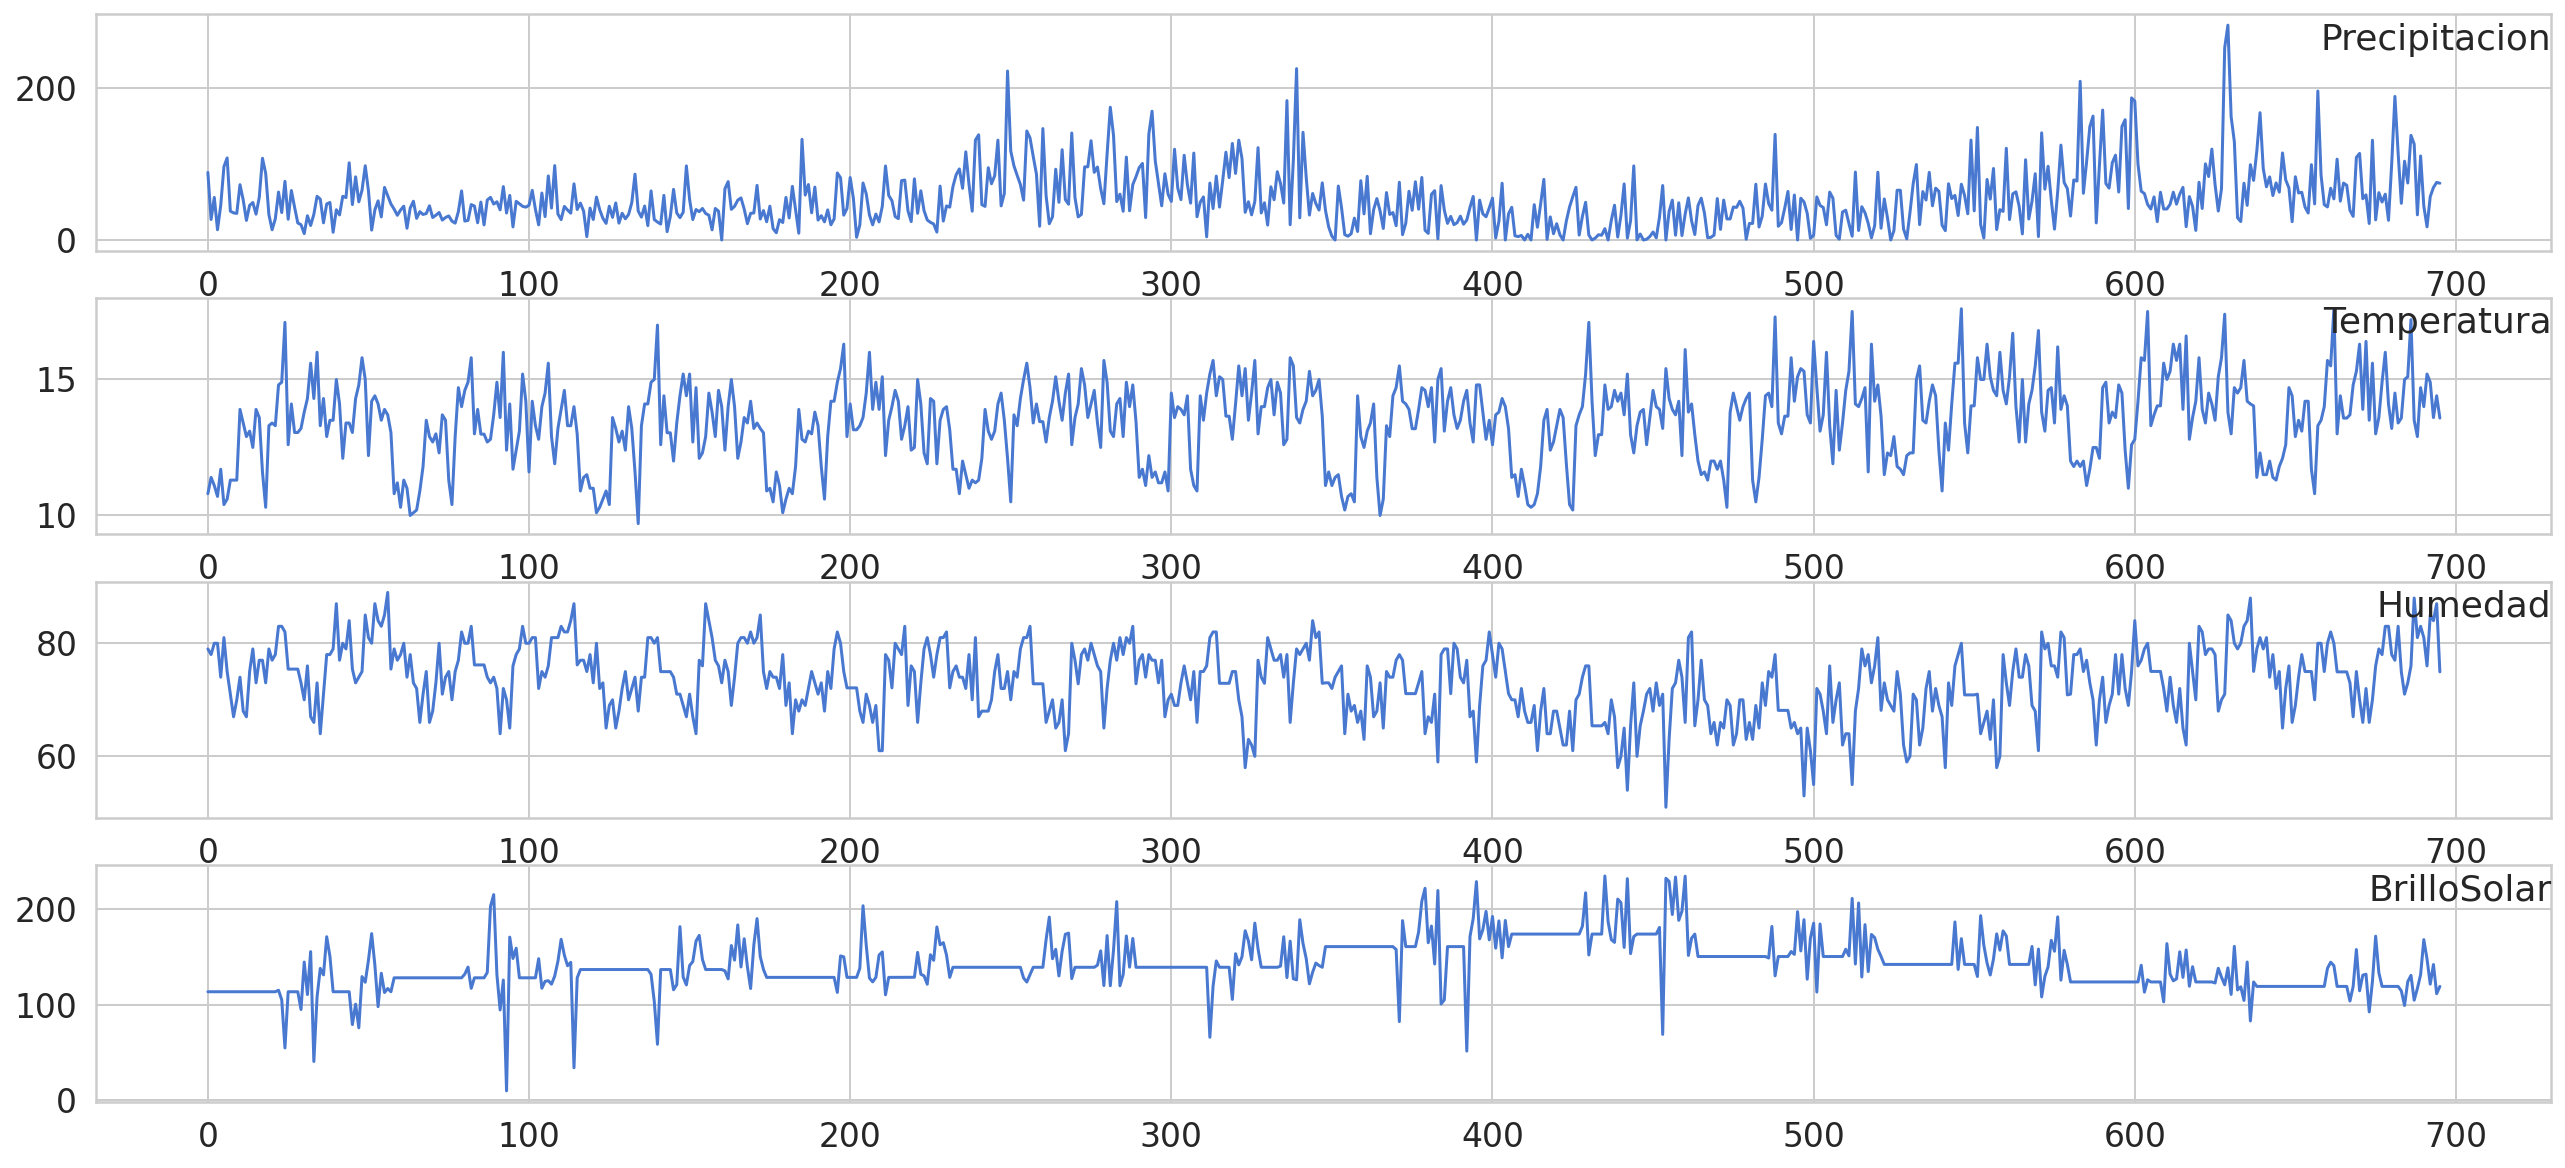

In [ ]:
#graphics station
#################graphics properties####################################
%matplotlib inline
%config InlineBackend.figure_format='retina'
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22, 10
#################graphics properties####################################


df_graphic_station = df_est


val = df_graphic_station.values
features = [3,4,5,6]

i =1
plt.figure()
for feature in features:
    plt.subplot(len(features),1,i)
    plt.plot(val[:,feature])
    plt.title(df_graphic_station.columns[feature], y= 0.8 , loc = 'right')
    i += 1


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/lo

Epoch 1/100
16/16 [==============================] - 5s 68ms/step - loss: 0.6055 - accuracy: 0.0072 - val_loss: 0.7221 - val_accuracy: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 19ms/step - loss: 0.6345 - accuracy: 0.0072 - val_loss: 0.6850 - val_accuracy: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 0s 20ms/step - loss: 0.5911 - accuracy: 0.0072 - val_loss: 0.6653 - val_accuracy: 0.0000e+00
Epoch 4/100
16/16 [==============================] - 0s 20ms/step - loss: 0.5848 - accuracy: 0.0072 - val_loss: 0.6584 - val_accuracy: 0.0000e+00
Epoch 5/100
16/16 [==============================] - 0s 22ms/step - loss: 0.5756 - accuracy: 0.0072 - val_loss: 0.6533 - val_accuracy: 0.0000e+00
Epoch 6/100
16/16 [==============================] - 0s 20ms/step - loss: 0.5691 - accuracy: 0.0072 - val_loss: 0.6515 - val_accuracy: 0.0000e+00
Epoch 7/100
16/16 [==============================] - 0s 20ms/step - loss: 0.5559 - accuracy: 0.0072 - val_loss: 0.6562 - val

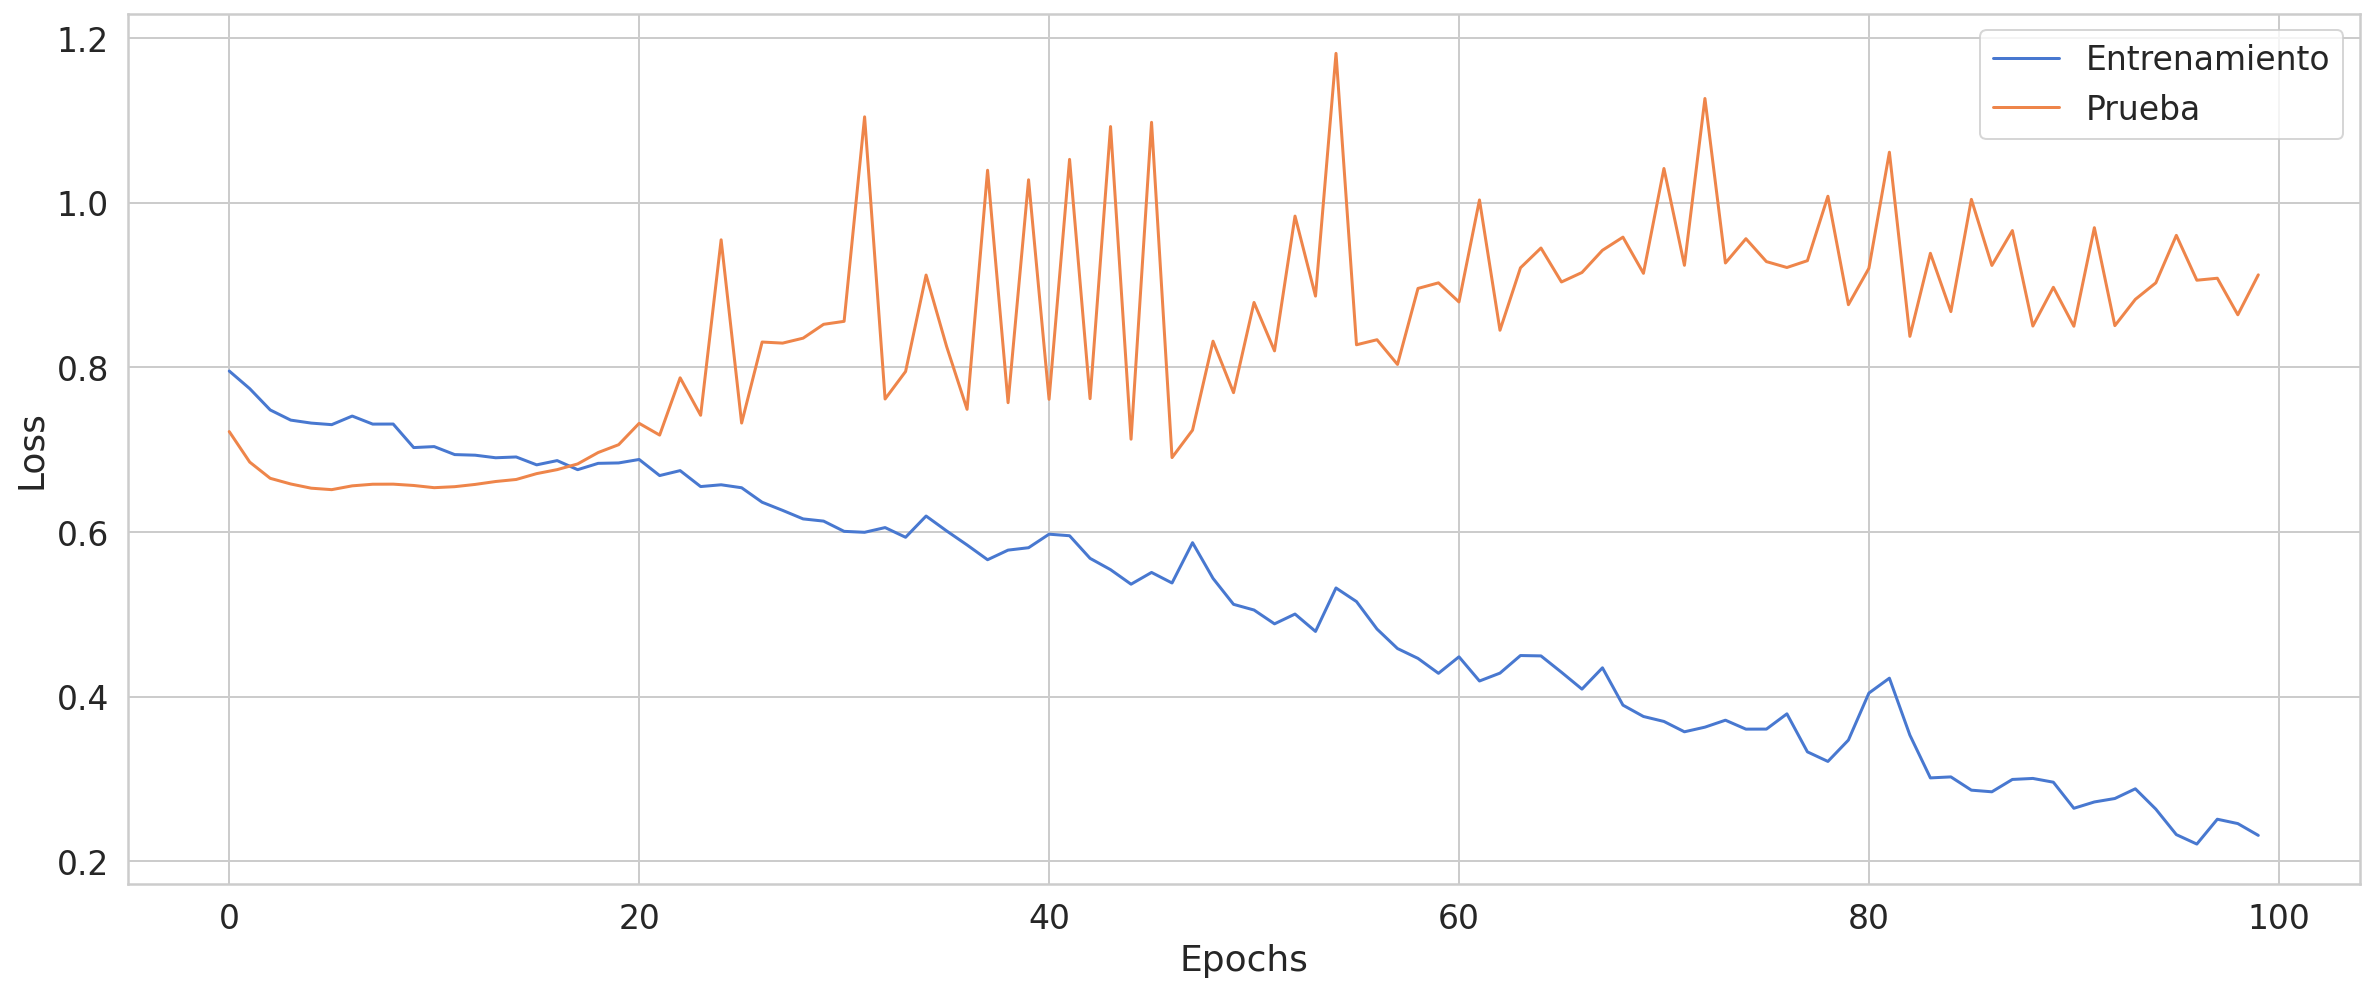

In [ ]:
#Define train & test - Pick a month


#dataset features
df_an = df_est.copy()
#dataset (y)
df_any = df_est.copy()
#dataset prediccion
df_anpr = df_pred.copy()
df_anypr = df_pred.copy()



#remover columnas adicionales entrenamiento
df_an.drop('Anio', inplace=True, axis=1)
df_an.drop('Mes', inplace=True, axis=1)
df_an.drop('Estacion', inplace=True, axis=1)
df_an.drop('Precipitacion', inplace=True, axis=1)

#remover columnas adicionales prediccion
df_anpr.drop('Anio', inplace=True, axis=1)
df_anpr.drop('Mes', inplace=True, axis=1)
df_anpr.drop('Estacion', inplace=True, axis=1)
df_anpr.drop('Precipitacion', inplace=True, axis=1)

########################################PARAMETROS MODELO##################################
#tamanio entrenamiento 
porcentaje_en = 0.8 
#tamanio segmento dataset
time_steps = 10
#parametros construccion modelo
units_lstm = 128
drate = 0.1
#parametros fit
epochs_ = 100
batchsize_ = 32
val_split = 0.1
########################################PARAMETROS MODELO##################################


# tamanio entrenamiento
tam_en = int(len(df_an)*porcentaje_en)
#tamanio pruebas
tam_pru = len(df_an) - tam_en

#dataframe entrenamiento
df_en   = df_an.iloc[0:tam_en]
dfy_en  = df_any.iloc[0:tam_en]


#dataframe pruebas [tamanio entrenamiento,tamanio dataframe]
df_pr =   df_an.iloc[tam_en:len(df_an)]
dfy_pr =  df_any.iloc[tam_en:len(df_an)]

from sklearn.preprocessing import RobustScaler

#caracteristicas climaticas
caract_col = ['Temperatura','Humedad','BrilloSolar']
caract_transformer = RobustScaler()
preci_transformer = RobustScaler()

caract_transformer = caract_transformer.fit(df_en[caract_col].to_numpy())

preci_transformer = preci_transformer.fit(dfy_en[['Precipitacion']])



#asignar transformadores  dataset entrenamiento
df_en.loc[:,caract_col] = caract_transformer.transform(df_en[caract_col].to_numpy())
dfy_en['Precipitacion'] = preci_transformer.transform(dfy_en[['Precipitacion']])

#asignar transformadores dataset pruebas
df_pr.loc[:,caract_col] = caract_transformer.transform(df_pr[caract_col].to_numpy())
dfy_pr['Precipitacion'] = preci_transformer.transform(dfy_pr[['Precipitacion']])

#asignar transformadores dataset prediccion
df_anpr.loc[:,caract_col] = caract_transformer.transform(df_anpr[caract_col].to_numpy())
df_anypr['Temperatura'] = preci_transformer.transform(df_anypr[['Temperatura']])


# crear secuencia 
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)


# secuencias entrenamiento
x_en,y_en = create_dataset(df_en,dfy_en.Precipitacion,time_steps)

# secuencias pruebas
x_pr,y_pr = create_dataset(df_pr,dfy_pr.Precipitacion,time_steps)

#secuencias prediccion
x_pre,y_pre = create_dataset(df_anpr,df_anypr.Temperatura,time_steps)


#creacion modelo
modelo = Sequential()

modelo.add(Bidirectional(
                          LSTM(units=units_lstm, input_shape=(x_en.shape[1], x_en.shape[2]))
                        )
          )
modelo.add(Dropout(rate=drate))
modelo.add(Dense(units=1))
modelo.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

#entrenar modelo
history = modelo.fit(x_en, y_en,epochs=epochs_, batch_size=batchsize_,validation_split=val_split,shuffle=False,)


#################graphics properties####################################
%matplotlib inline
%config InlineBackend.figure_format='retina'
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 20, 8
#################graphics properties####################################
loss = history.history['loss']
val_loss= history.history['val_loss']
plt.plot(loss, label='Entrenamiento')
plt.plot(val_loss, label='Prueba')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();


##################### mean squared error #############################
#https://www.youtube.com/watch?v=fWFVXEXwIBQ
#https://www.mygreatlearning.com/blog/mean-square-error-explained/

In [ ]:
history.history

{'accuracy': [0.006109979469329119,
  0.006109979469329119,
  0.006109979469329119,
  0.006109979469329119,
  0.006109979469329119,
  0.006109979469329119,
  0.006109979469329119,
  0.006109979469329119,
  0.006109979469329119,
  0.006109979469329119,
  0.006109979469329119,
  0.004073319956660271,
  0.004073319956660271,
  0.004073319956660271,
  0.004073319956660271,
  0.004073319956660271,
  0.004073319956660271,
  0.004073319956660271,
  0.004073319956660271,
  0.004073319956660271,
  0.004073319956660271,
  0.004073319956660271,
  0.004073319956660271,
  0.004073319956660271,
  0.004073319956660271,
  0.004073319956660271,
  0.004073319956660271,
  0.004073319956660271,
  0.004073319956660271,
  0.006109979469329119],
 'loss': [0.7990788817405701,
  0.7708957195281982,
  0.74991774559021,
  0.7332401275634766,
  0.7308890223503113,
  0.7303975224494934,
  0.7416060566902161,
  0.7270775437355042,
  0.7246452569961548,
  0.6984071731567383,
  0.6993525624275208,
  0.693693459033966

In [ ]:
# generar predicciones utilizando el dataset de pruebas
y_pred = modelo.predict(x_pr)

print("Dimensiones - Secuencia")
print("x_en ",x_en.shape)
print("y_en ",y_en.shape)
print("x_pr ",x_pr.shape)
print("y_pr ",y_pr.shape)
print("y_pred", y_pred.shape)

print("y_pred[0]", y_pred[0])
print("y_pred[0,0]", y_pred[0,0])

Dimensiones - Secuencia
x_en  (546, 10, 3)
y_en  (546,)
x_pr  (130, 10, 3)
y_pr  (130,)
y_pred (130, 1)
y_pred[0] [2.2809224]
y_pred[0,0] 2.2809224


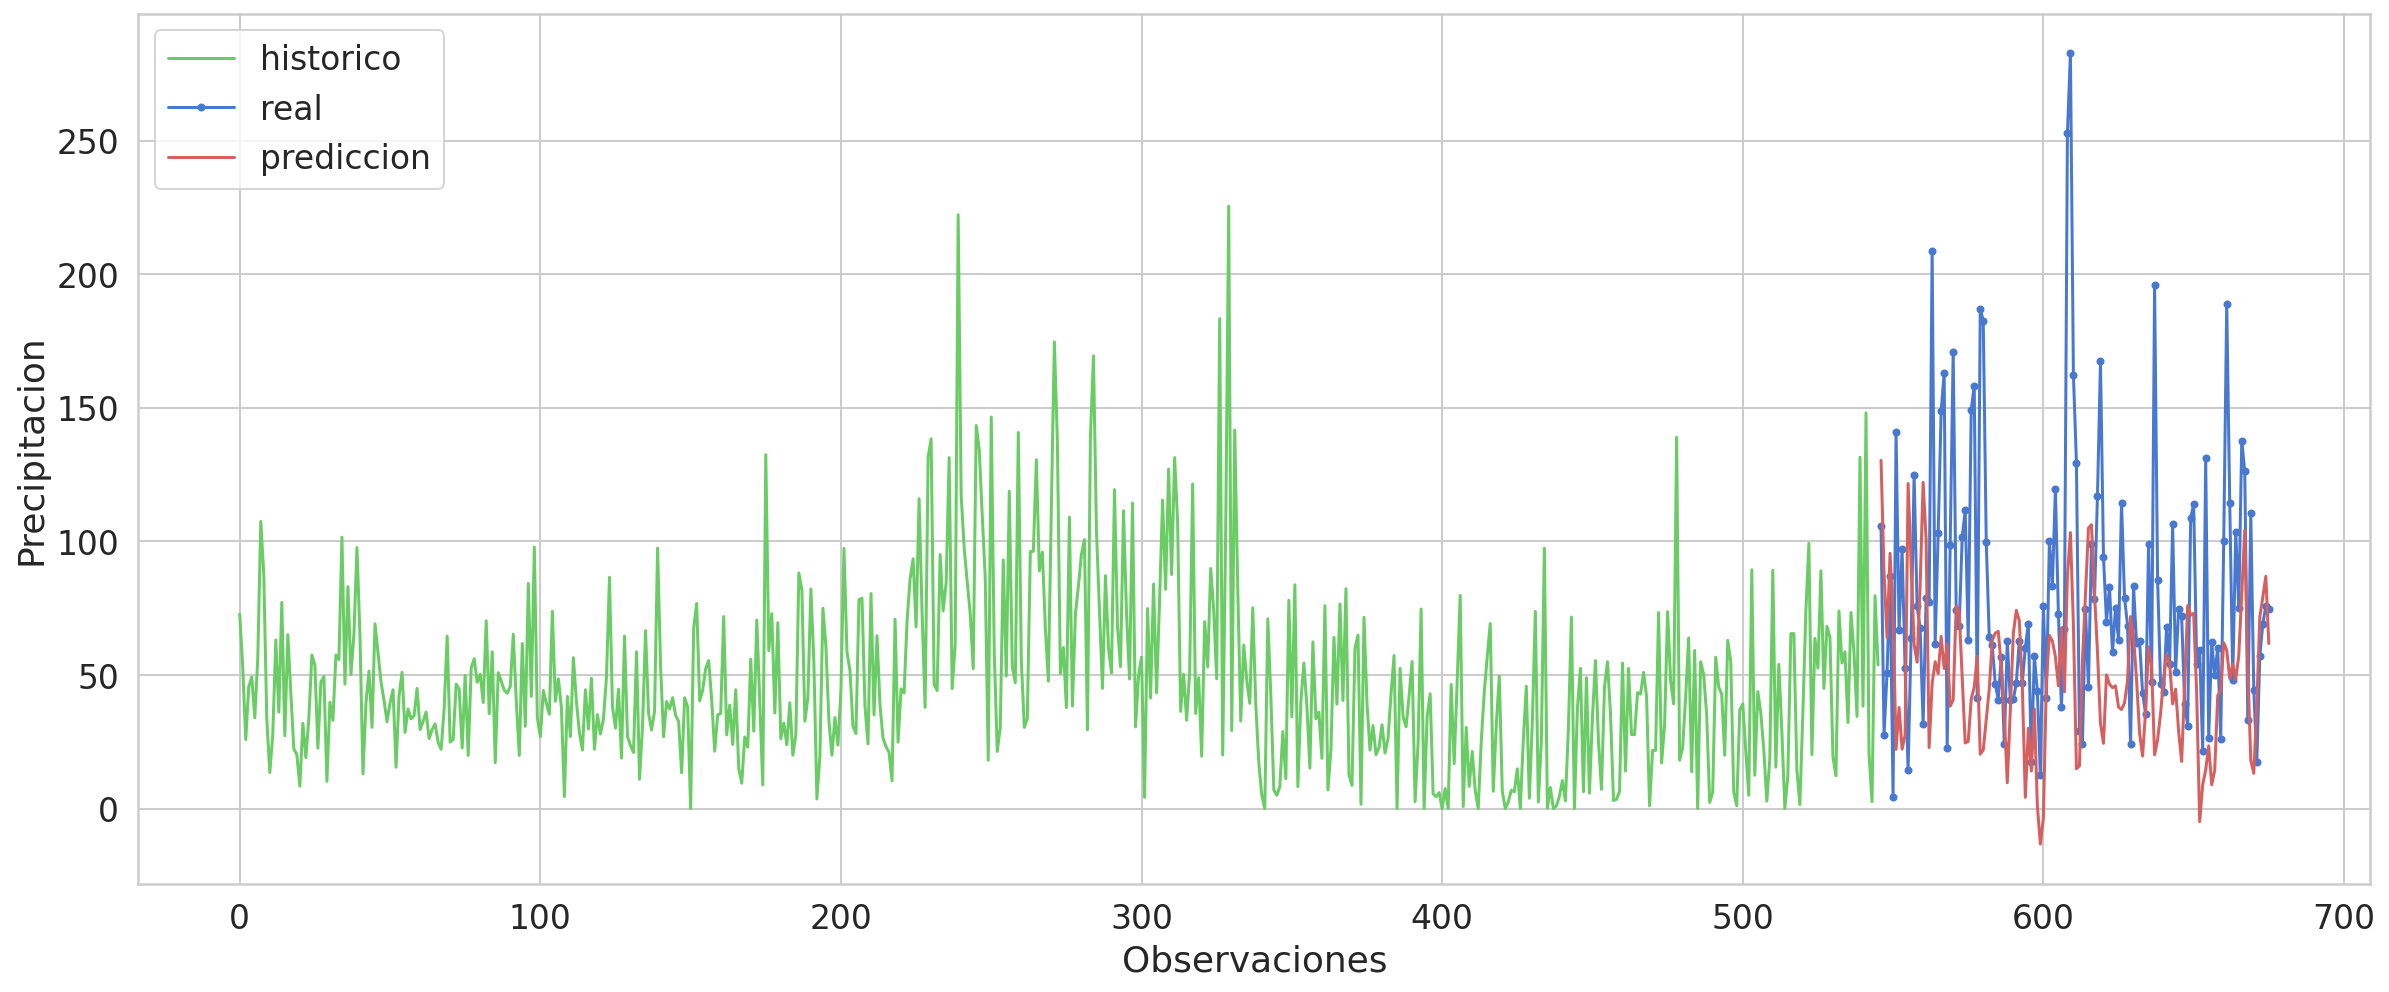

In [ ]:
y_en_inv = preci_transformer.inverse_transform(y_en.reshape(1, -1))
y_pr_inv = preci_transformer.inverse_transform(y_pr.reshape(1, -1))
y_pred_inv = preci_transformer.inverse_transform(y_pred)

#graficar predicciones
plt.plot(np.arange(0, len(y_en)), y_en_inv.flatten(), 'g', label="historico")
plt.plot(np.arange(len(y_en), len(y_en) + len(y_pr)), y_pr_inv.flatten(), marker='.', label="real")
plt.plot(np.arange(len(y_en), len(y_en) + len(y_pr)), y_pred_inv.flatten(), 'r', label="prediccion")
plt.ylabel('Precipitacion')
plt.xlabel('Observaciones')
plt.legend()
plt.show();

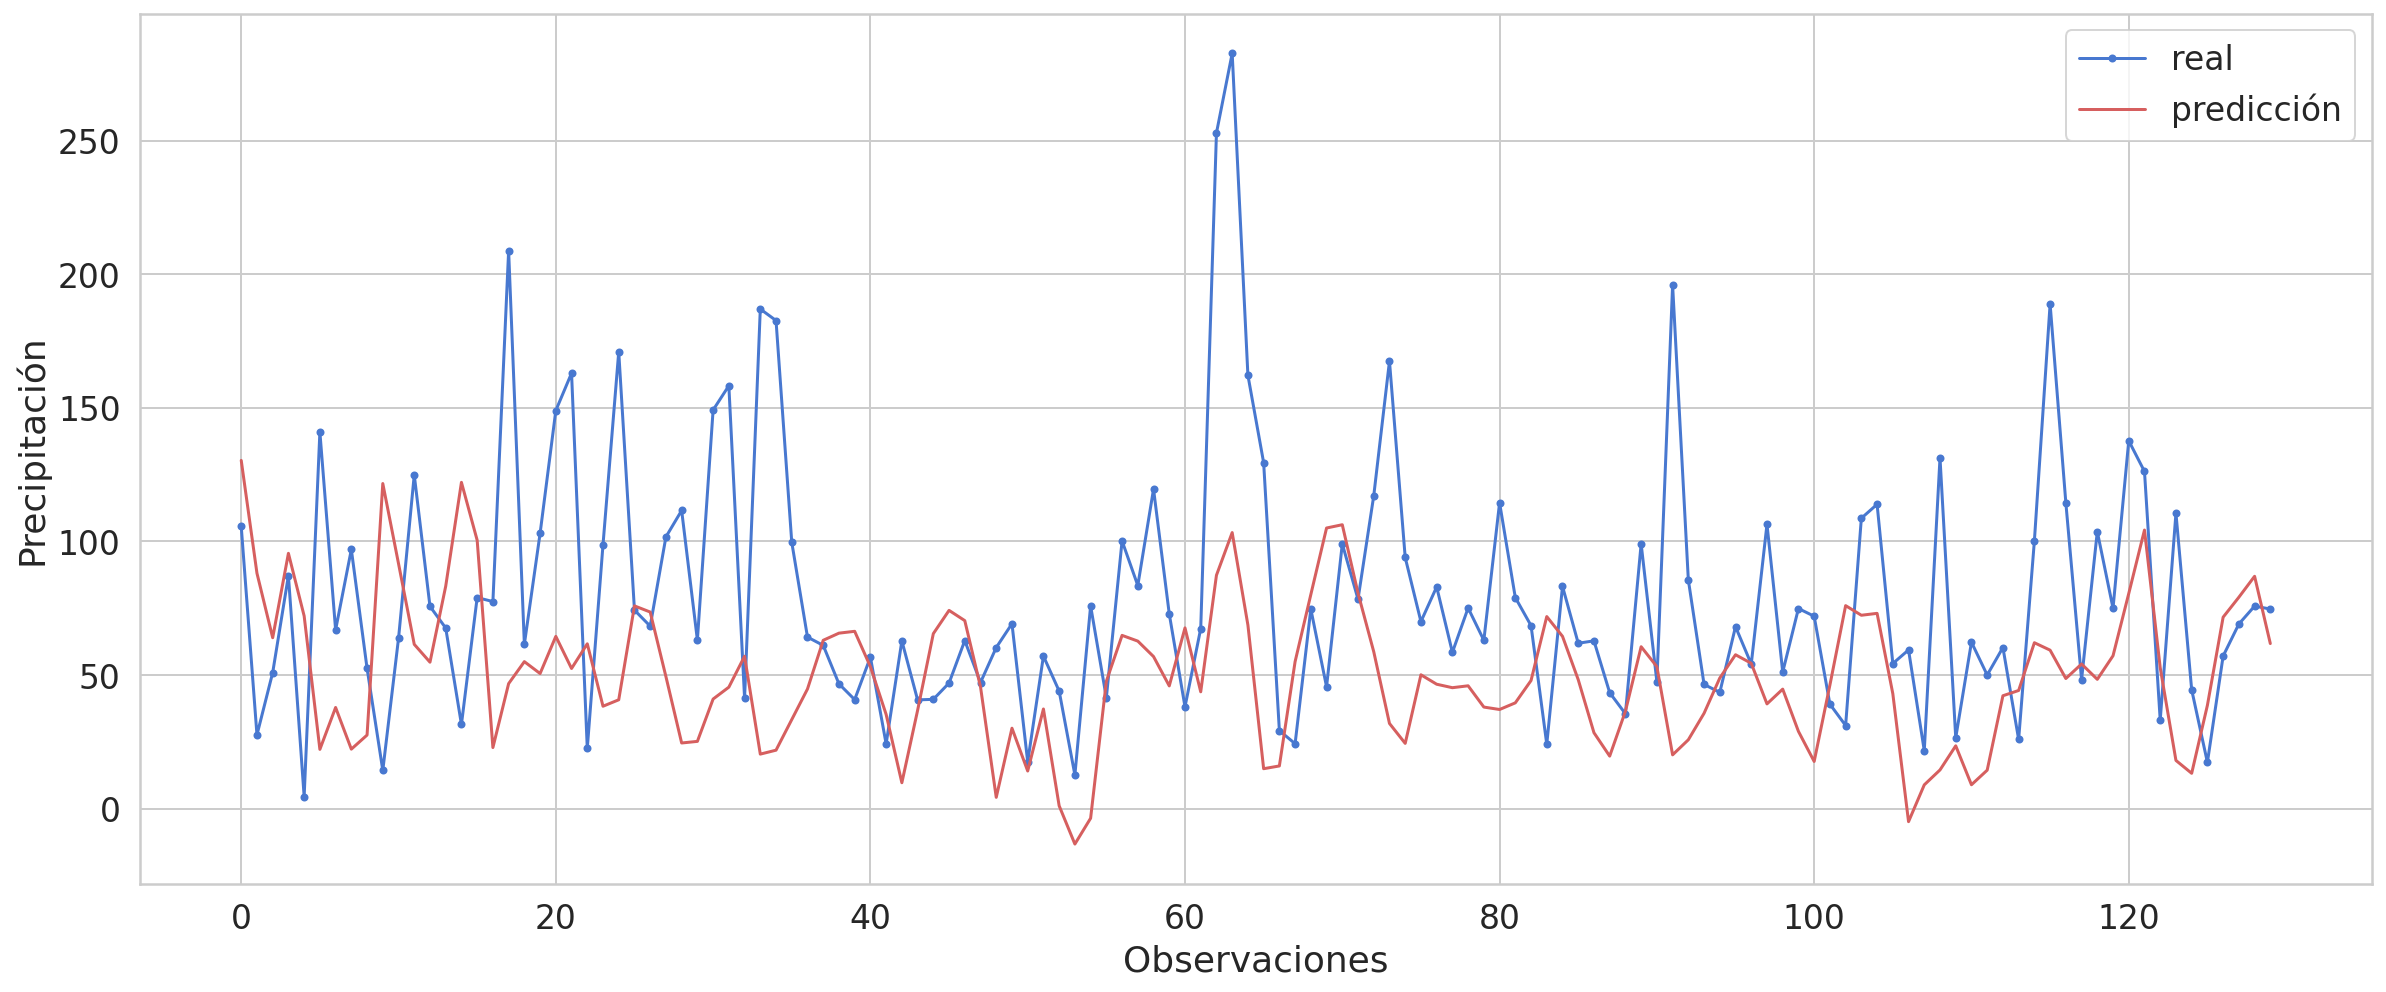

In [ ]:
plt.plot(y_pr_inv.flatten(), marker='.', label="real")
plt.plot(y_pred_inv.flatten(), 'r', label="predicción")
plt.ylabel('Precipitación')
plt.xlabel('Observaciones')
plt.legend()
plt.show();

In [ ]:

print("Dimensiones - Secuencia")
print("x_en ",x_en.shape)
print("y_en ",y_en.shape)
print("x_pr ",x_pr.shape)
print("x_pre ",x_pre.shape)
print("y_pr ",y_pr.shape)
print("y_pred", y_pred.shape)


#generar predicciones utilizando los datos generados
x_pre.shape

y_pred2 = modelo.predict(x_pre)
y_pred_inv2 = preci_transformer.inverse_transform(y_pred2)

Dimensiones - Secuencia
x_en  (546, 10, 3)
y_en  (546,)
x_pr  (130, 10, 3)
x_pre  (1, 10, 3)
y_pr  (130,)
y_pred (130, 1)


In [ ]:
y_pred_inv2[0,0]

22.581705

In [ ]:
# def predic_precipitacion (df):
#   estaciones = ['2120639','2120630','2120646','2120641','2120644','2120647','2119514','2306517','2306516']
#   rows = []
#   for e in estaciones:
#     for i in range (12):
#       mes = str(i+1)



def pred (df):
 estaciones = ['2120540','2306507','2120557','2401519','2120562','2120548','2120559','2120561','2120629','2401513','2120639','2120630','2120646','2120641','2120644','2120647','2119514','2306517','2306516'] 
 rows = []
 for e in estaciones:
      for i in range (12):
            mes = str(i+1)
            mm = mes
            if (len(mes)==1): mm = '0'+mes
            df_pred = sub_pred (df,str(e),mes,11)
            #df_pred = sub_pred (df,cod_estacion,mes,11)
            #crear  x & y
            df_anpr = df_pred.copy()
            df_anypr = df_pred.copy()
            #remover columnas adicionales prediccion
            df_anpr.drop('Anio', inplace=True, axis=1)
            df_anpr.drop('Mes', inplace=True, axis=1)
            df_anpr.drop('Estacion', inplace=True, axis=1)
            df_anpr.drop('Precipitacion', inplace=True, axis=1)
            #asignar transformadores dataset prediccion
            df_anpr.loc[:,caract_col] = caract_transformer.transform(df_anpr[caract_col].to_numpy())
            df_anypr['Temperatura'] = preci_transformer.transform(df_anypr[['Temperatura']])
            #secuencias prediccion
            x_pre,y_pre = create_dataset(df_anpr,df_anypr.Temperatura,time_steps)
            #generar predicciones utilizando los datos generados
            y_pred2 = modelo.predict(x_pre)
            #reversar transformador
            y_pred_inv2 = preci_transformer.inverse_transform(y_pred2)
            #agregar resultado en array
            rows.append(['2021-'+mm+'-01','2021',mes,str(e),y_pred_inv2[0,0]]) 
 dd=  pd.DataFrame(rows, columns=["Fecha", "Anio","Mes","Estacion","Precipitacion"])
 return dd


total = pred (df)

#pred (df,'2120540')

In [ ]:
# #export fixed dataframe
# #export csv file to local computer
from google.colab import files
total.to_csv('precip.csv',index=False)
files.download('precip.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sqldf('select * from total where estacion = 2120540')
#sqldf('select * from total where Precipitacion < 0')

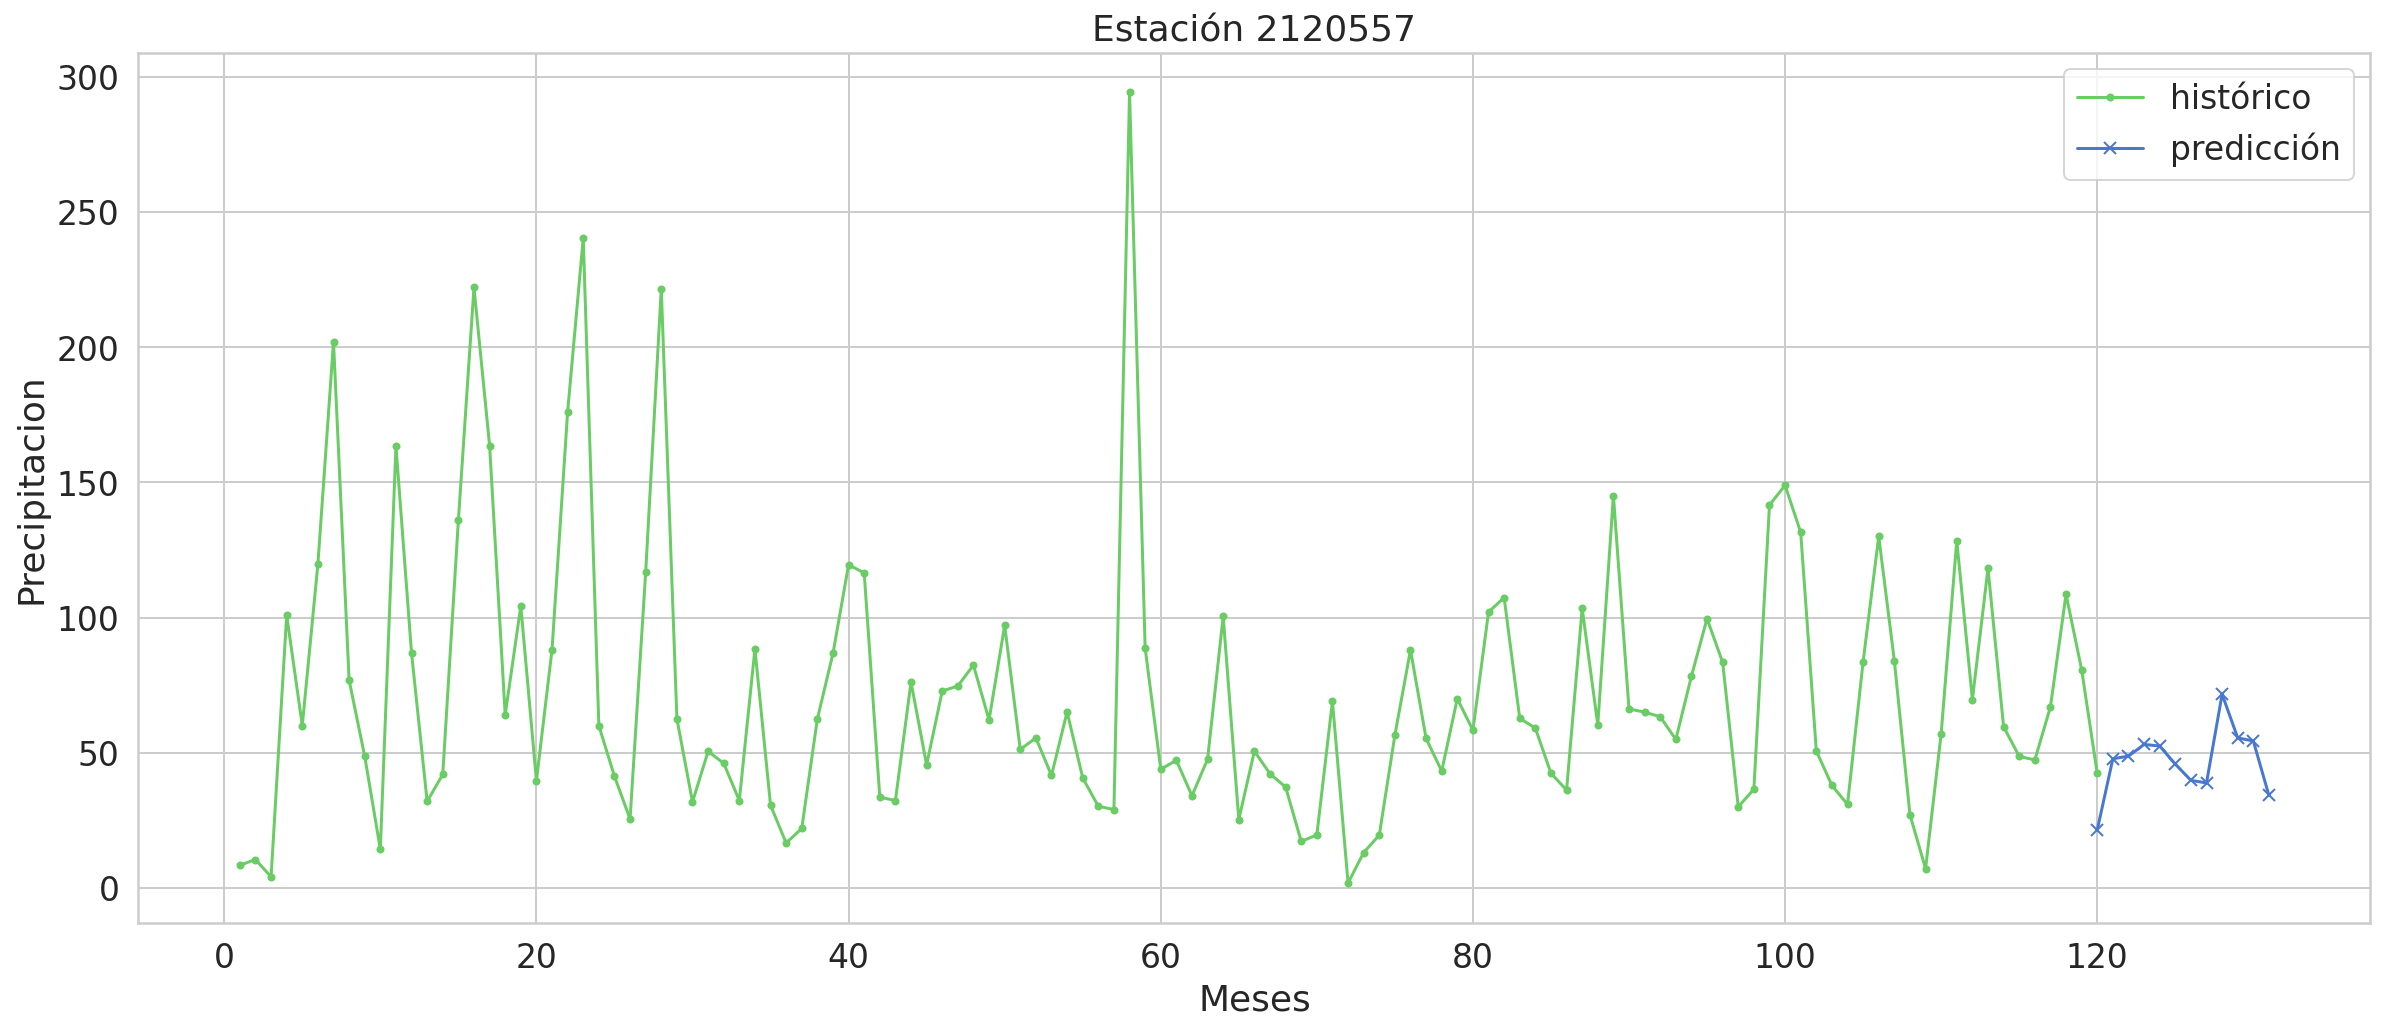

In [ ]:
#combine data & predictions

tam=120
estaciones = ['2120540','2306507','2120557','2401519','2120562','2120548','2120559','2120561','2120629','2401513','2120639','2120630','2120646','2120641','2120644','2120647','2119514','2306517','2306516'] 
esta = estaciones[2]
dfh = df.copy() 
dfp = total.copy()

dfhh = sqldf('select Anio, Mes, Estacion, Precipitacion from dfh where Estacion = '+ esta + '').sort_values(by=['Anio','Mes']).tail(tam)
dfpp = sqldf('select Anio, Mes, Estacion, Precipitacion from dfp where Estacion = '+ esta + '')
#df_t = pd.concat([dfhh,dfpp])


dfhh.insert(0, 'New_ID', range(1, 1 + tam))
dfpp.insert(0, 'New_ID', range(tam,tam+len(dfpp) ))


plt.plot(dfhh['New_ID'],dfhh['Precipitacion'] , 'g', marker='.', label="histórico")
plt.plot(dfpp['New_ID'],dfpp['Precipitacion'] , 'b',marker='x', label="predicción")

plt.ylabel('Precipitacion')
plt.xlabel('Meses')
plt.title('Estación '+esta , loc = 'center')
plt.legend()
plt.show();


In [ ]:
dfhh.columns['']

IndexError: ignored

In [ ]:
#test graphic

# initialize list of lists 
data1 = [[1, 10], [2, 15], [3, 14]] 
data2 = [[3, 14], [4, 15], [5, 14]] 
  
# Create the pandas DataFrame 
df1 = pd.DataFrame(data1, columns = ['Step', 'Val']) 
df2 = pd.DataFrame(data2, columns = ['Step', 'Val']) 


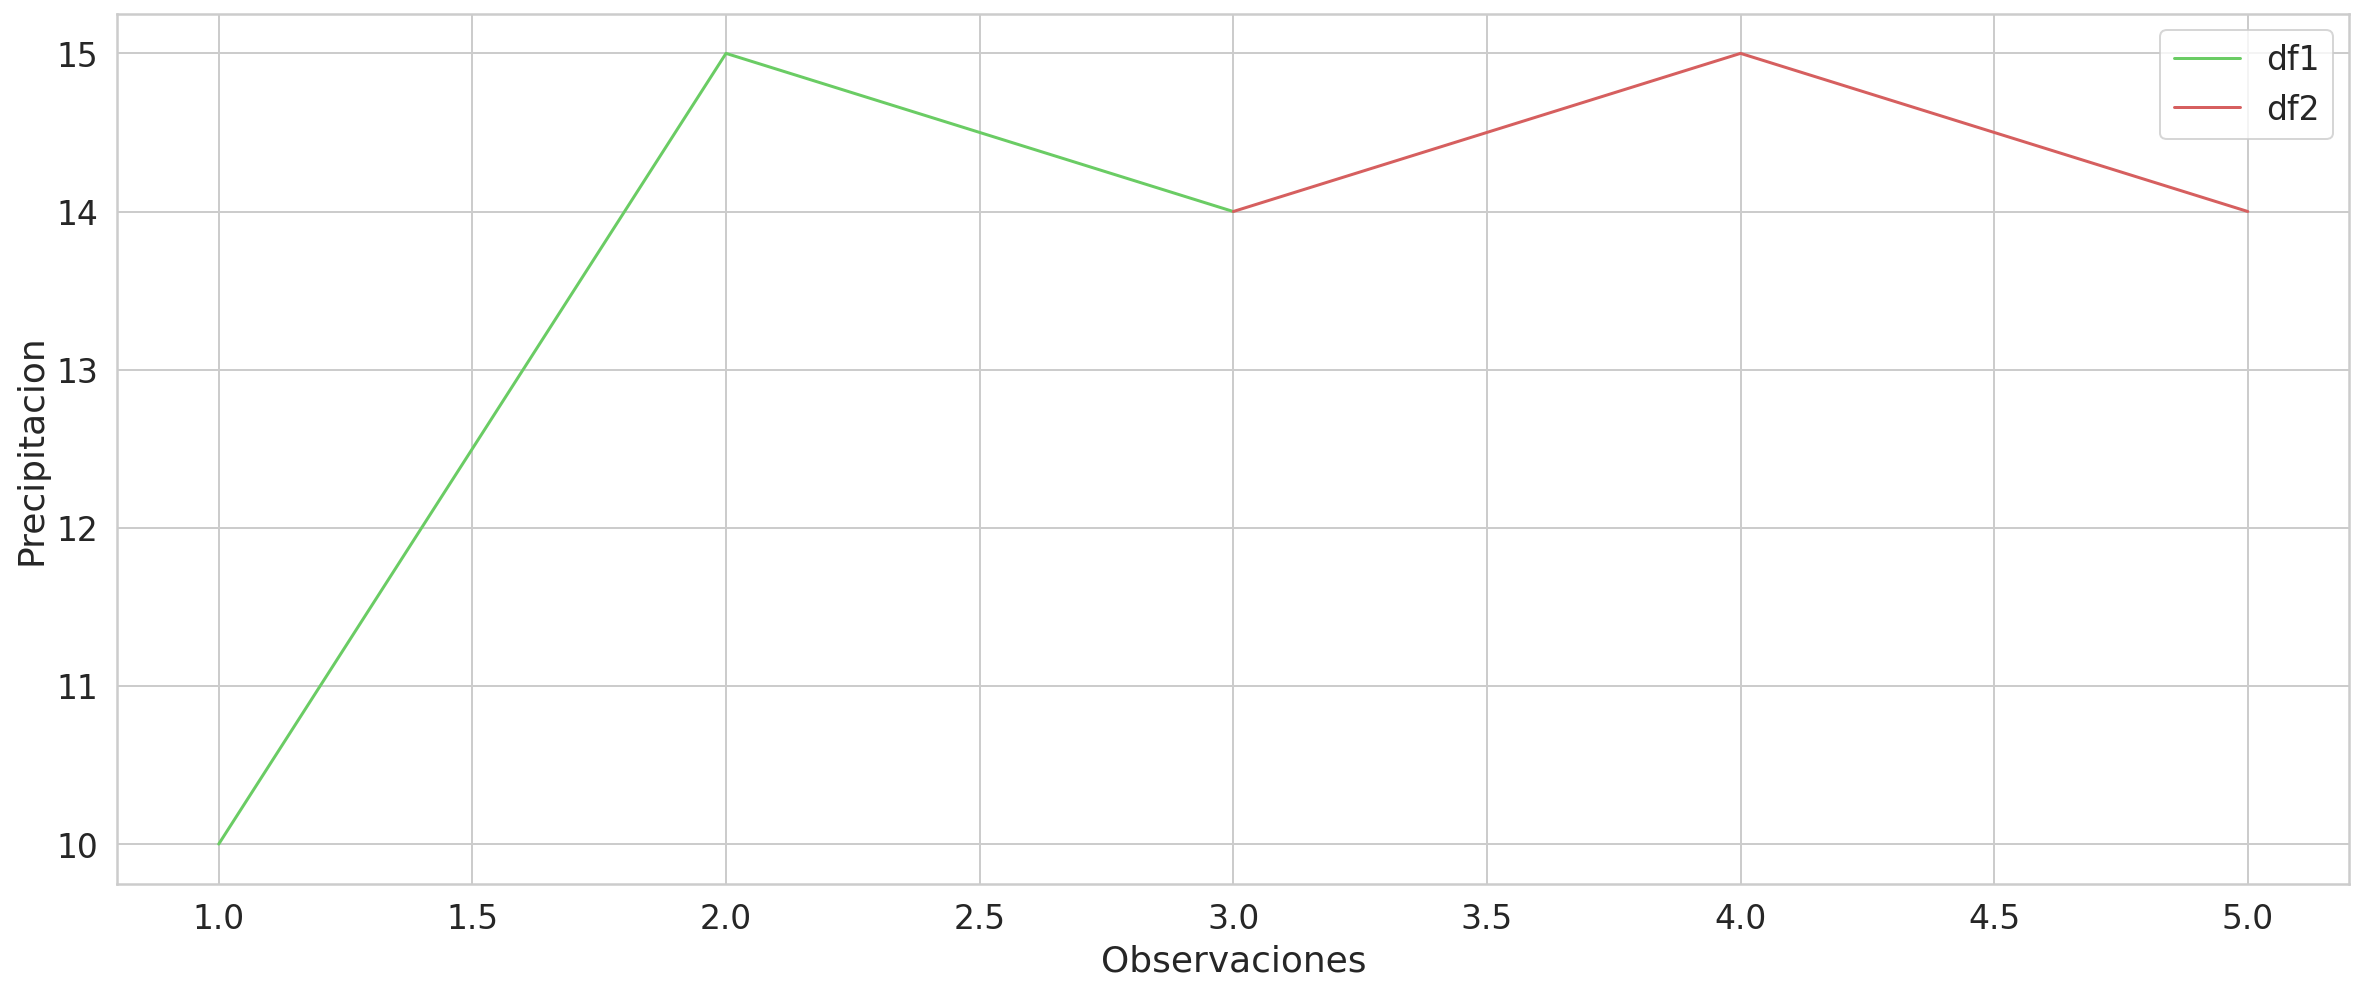

In [ ]:
plt.plot(df1['Step'],df1['Val'] , 'g', label="df1")
plt.plot(df2['Step'],df2['Val'] , 'r', label="df2")

plt.ylabel('Precipitacion')
plt.xlabel('Observaciones')
plt.legend()
plt.show();


IndexError: ignored